📊 CIC-IDS2017 Exploratory Data Analysis
🚀 COMPREHENSIVE EDA ANALYSIS
📊 DATASET OVERVIEW
Dataset Shape: (100000, 91)
Memory Usage: 73.94 MB

Class Distribution:
Normal Traffic: 80,210 (80.2%)
Attack Traffic: 19,790 (19.8%)

Attack Types: 14

Top 10 Attack Types:
  BENIGN: 80,210 (80.21%)
  DoS Hulk: 7,978 (7.98%)
  PortScan: 5,827 (5.83%)
  DDoS: 4,552 (4.55%)
  DoS GoldenEye: 358 (0.36%)
  FTP-Patator: 286 (0.29%)
  DoS Slowhttptest: 218 (0.22%)
  SSH-Patator: 217 (0.22%)
  DoS slowloris: 210 (0.21%)
  Bot: 69 (0.07%)

🎯 ATTACK TYPE ANALYSIS


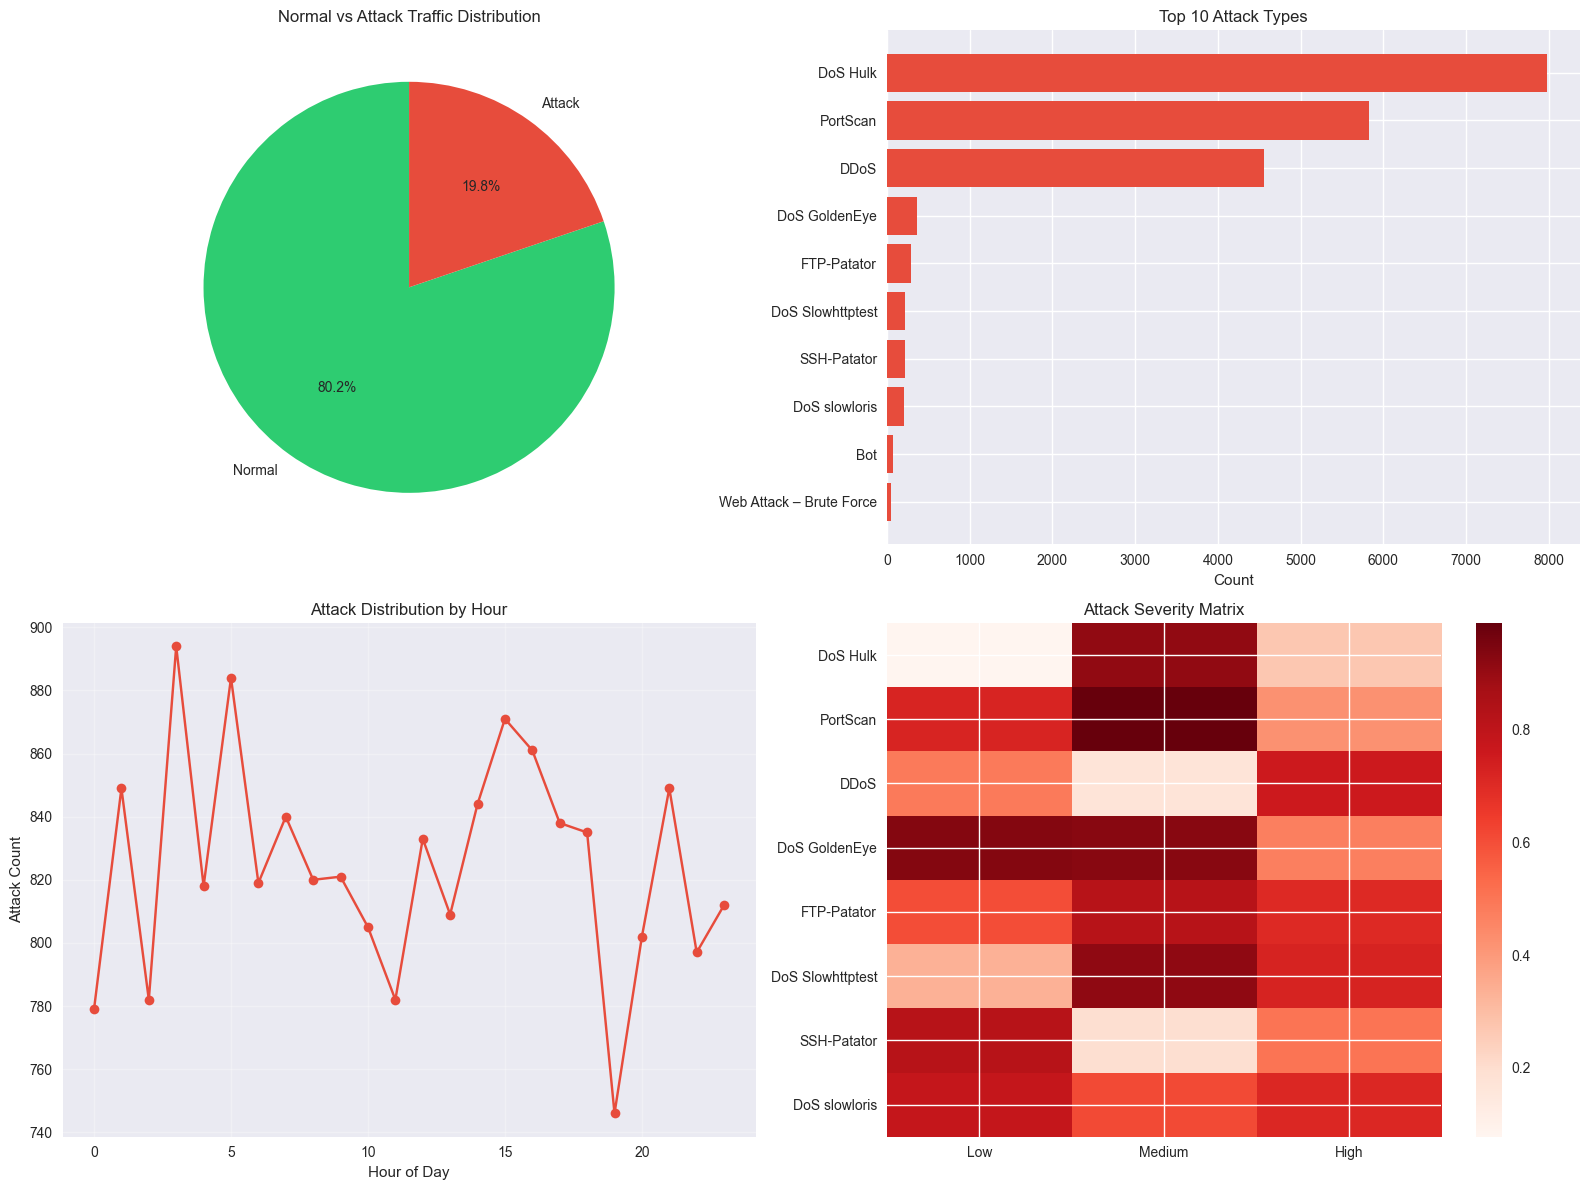


🌊 TRAFFIC FLOW ANALYSIS
Analyzing 41 flow features:
  • Flow_ID
  • Flow_Duration
  • Total_Fwd_Packets
  • Total_Backward_Packets
  • Total_Length_of_Fwd_Packets
  • Total_Length_of_Bwd_Packets
  • Fwd_Packet_Length_Max
  • Fwd_Packet_Length_Min
  • Fwd_Packet_Length_Mean
  • Fwd_Packet_Length_Std

📊 Flow Statistics Summary:
             Flow_ID  Flow_Duration  Total_Fwd_Packets  \
count  100000.000000  100000.000000      100000.000000   
mean        0.076950       4.762436           2.780583   
std         0.595251      10.898151         314.220787   
min        -0.946967      -0.010143          -0.333333   
25%        -0.414776      -0.010089           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.585224       0.989911           1.000000   
max         1.180452      38.966217       73252.333333   

       Total_Backward_Packets  Total_Length_of_Fwd_Packets  \
count           100000.000000                100000.000000   
mean                 3.2

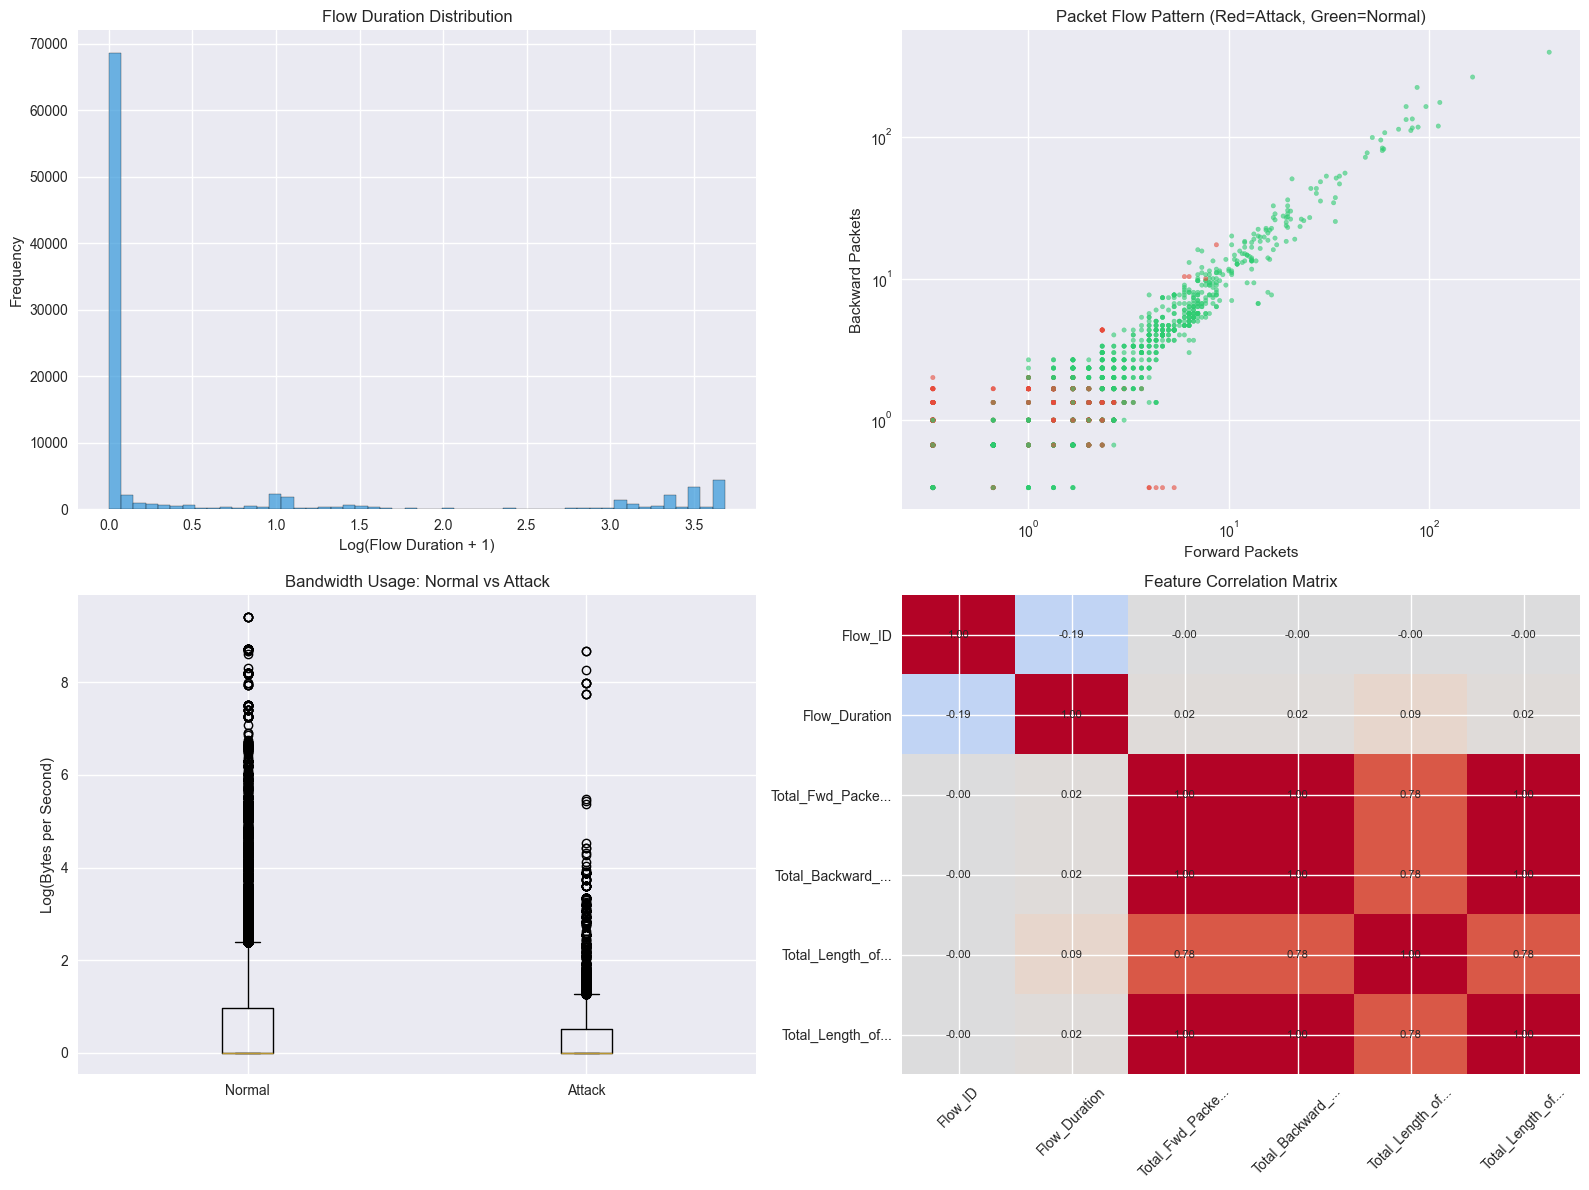


🔍 ANOMALY DETECTION FEATURE ANALYSIS
📊 Top 10 Most Discriminative Features:
                   Feature  Effect_Size        P_Value  Significant
19   Bwd_Packet_Length_Std     3.862829   0.000000e+00         True
16   Bwd_Packet_Length_Max     2.920176  2.734777e-147         True
18  Bwd_Packet_Length_Mean     2.546072  1.988800e-137         True
0                  Flow_ID     1.569459   0.000000e+00         True
1                Source_IP     0.922706   0.000000e+00         True
5                 Protocol     0.883164   0.000000e+00         True
17   Bwd_Packet_Length_Min     0.655235   0.000000e+00         True
7            Flow_Duration     0.585567   2.906530e-61         True
6                Timestamp     0.553655   0.000000e+00         True
4         Destination_Port     0.338849  4.164365e-135         True


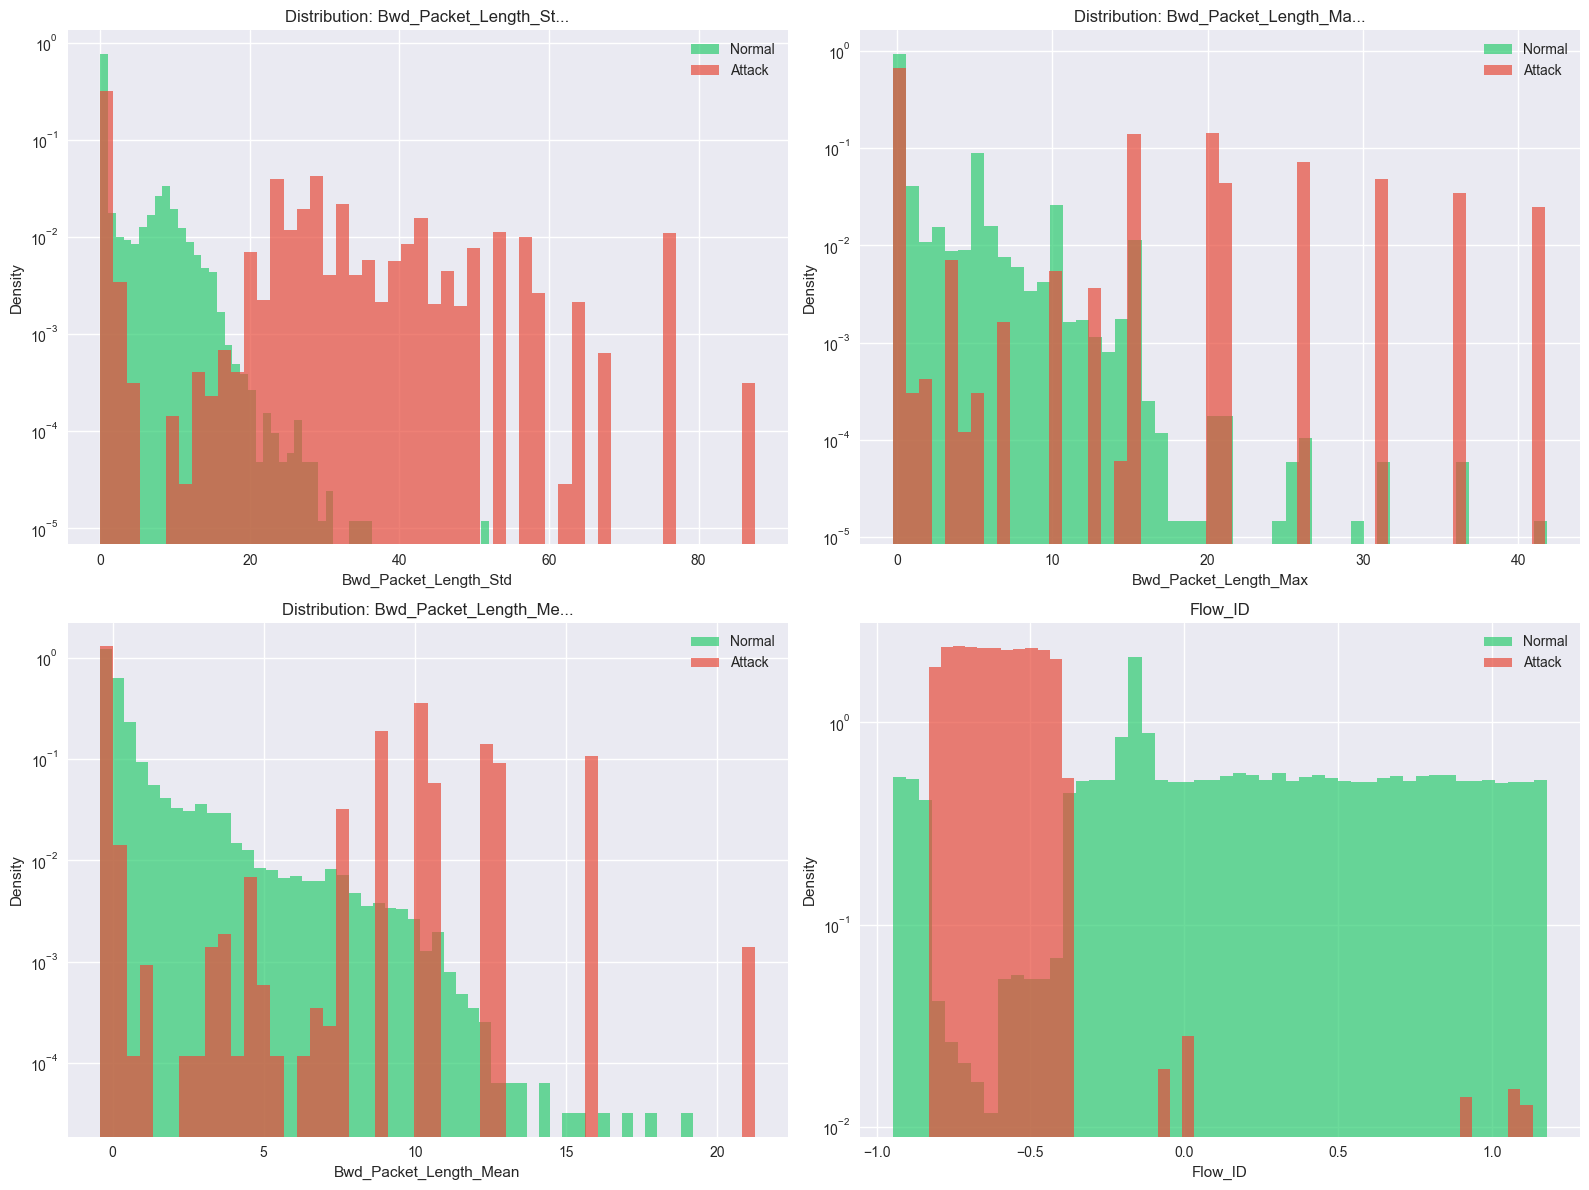


🌐 PROTOCOL ANALYSIS
📊 Top 10 Protocol/Service Distribution:
  0.0: 64,716 (64.72%)
  1.0: 35,227 (35.23%)
  -0.5454545454545454: 57 (0.06%)

🎯 Attack Rate by Protocol/Service:
  0.0: 30.6% (19790/64716)
  -0.5454545454545454: 0.0% (0/57)
  1.0: 0.0% (0/35227)


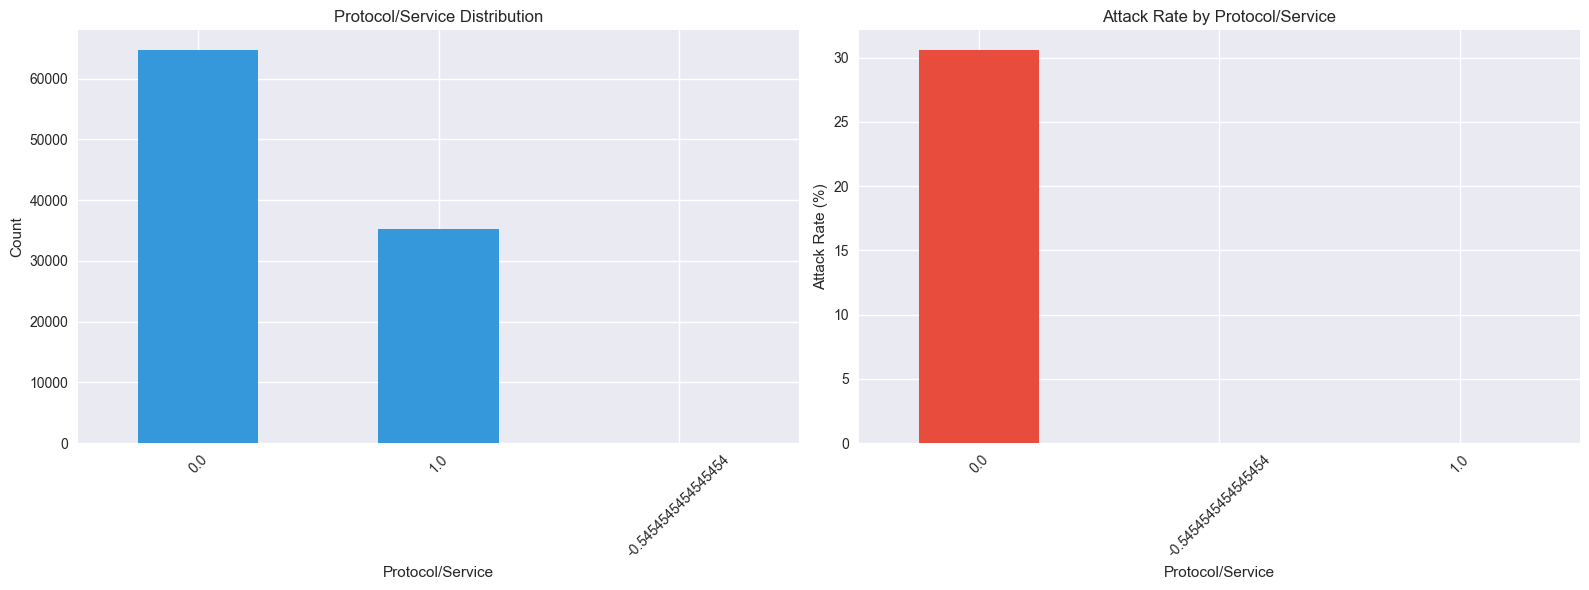


⏰ TEMPORAL ANALYSIS
📊 Hourly Traffic Patterns:
                Total_Traffic  Attack_Count  Attack_Rate
synthetic_hour                                          
0                        4051           817        0.202
1                        4150           810        0.195
2                        4071           801        0.197
3                        4246           808        0.190
4                        4192           795        0.190
5                        4159           839        0.202
6                        4130           777        0.188
7                        4128           821        0.199
8                        4167           819        0.197
9                        4228           835        0.197
10                       4037           766        0.190
11                       4185           825        0.197
12                       4272           869        0.203
13                       3996           779        0.195
14                       4184           

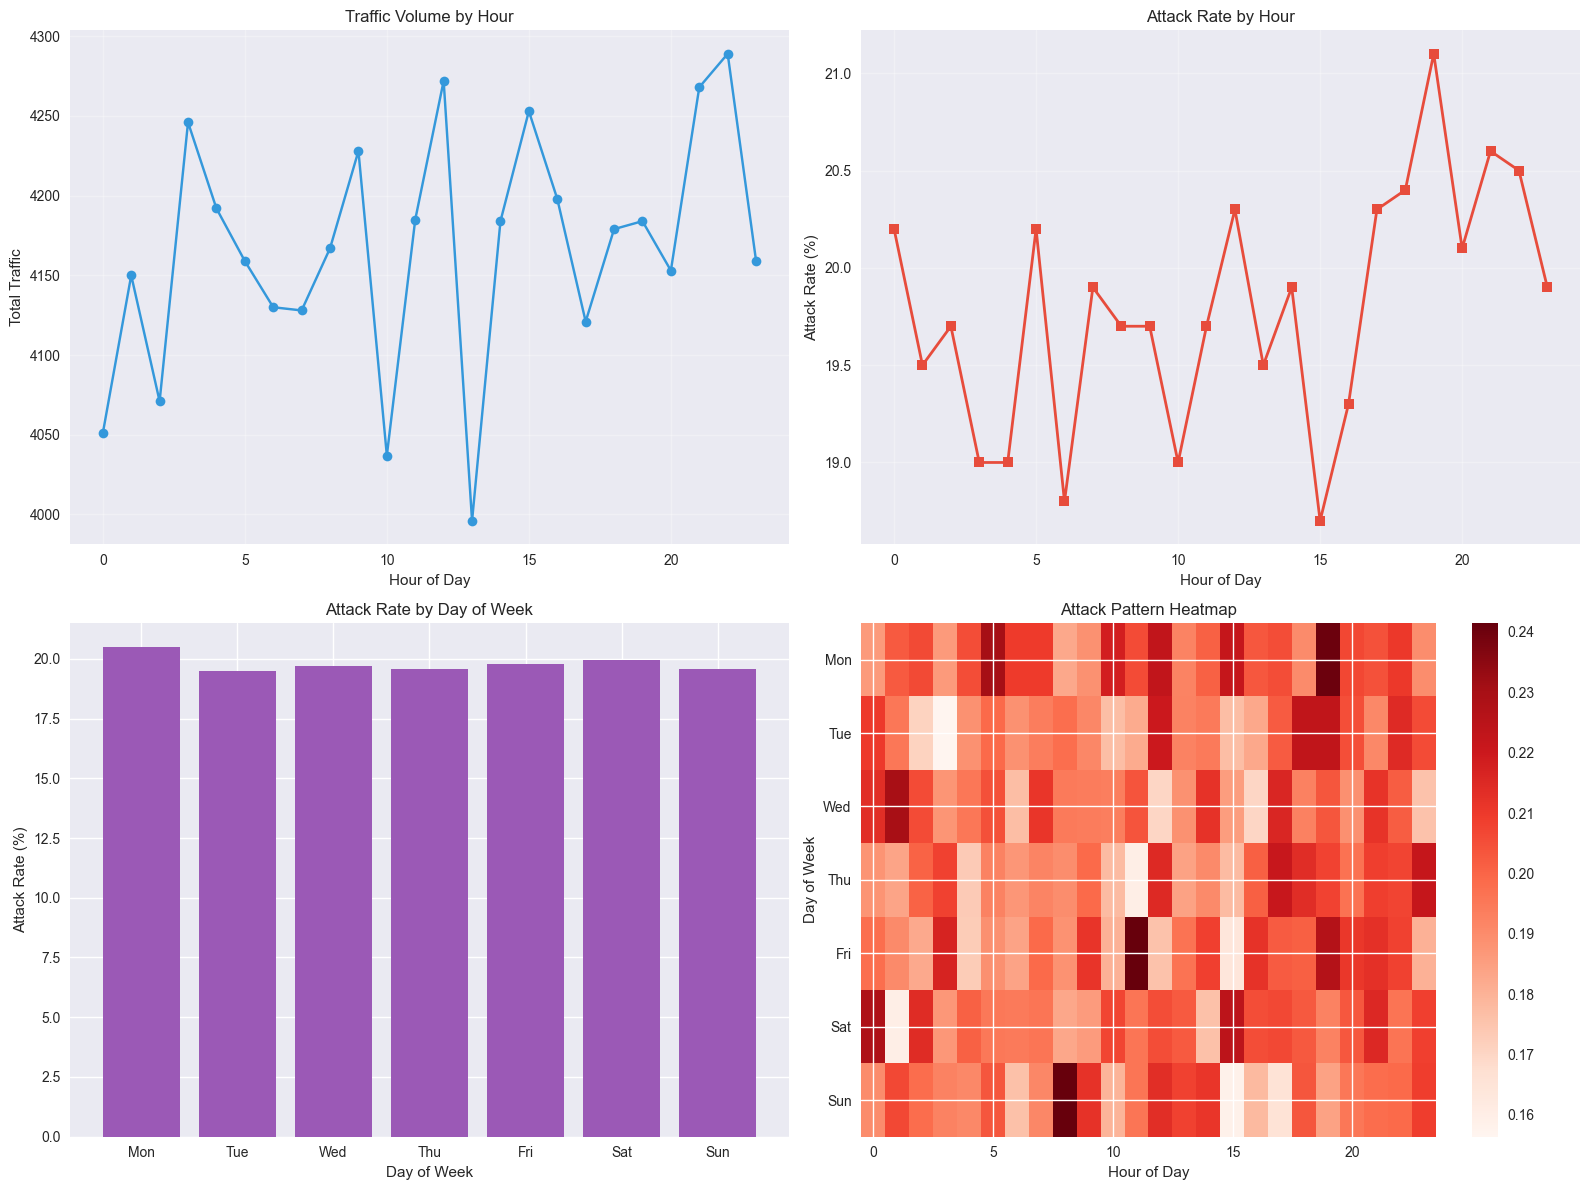


📋 INSIGHTS REPORT
🔍 Key Insights:
1. Dataset contains 100,000 network flow records
2. Overall attack rate: 19.79%
3. Most discriminative feature: Bwd_Packet_Length_Std
4. Multiple categorical features available for protocol analysis


In [3]:
#Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class NetworkTrafficEDA:
    """
    Comprehensive EDA for network traffic data
    """
    
    def __init__(self, df):
        self.df = df
        self.feature_cols = [col for col in df.columns if col not in ['Label', 'Is_Attack', 'Label_Encoded']]
        self.numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        
    def overview_analysis(self):
        """General dataset overview"""
        print("📊 DATASET OVERVIEW")
        print("=" * 50)
        
        print(f"Dataset Shape: {self.df.shape}")
        print(f"Memory Usage: {self.df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Class distribution
        if 'Is_Attack' in self.df.columns:
            class_dist = self.df['Is_Attack'].value_counts()
            print(f"\nClass Distribution:")
            print(f"Normal Traffic: {class_dist[0]:,} ({class_dist[0]/len(self.df)*100:.1f}%)")
            print(f"Attack Traffic: {class_dist[1]:,} ({class_dist[1]/len(self.df)*100:.1f}%)")
        
        if 'Label' in self.df.columns:
            print(f"\nAttack Types: {self.df['Label'].nunique()}")
            print("\nTop 10 Attack Types:")
            attack_types = self.df['Label'].value_counts().head(10)
            for attack, count in attack_types.items():
                print(f"  {attack}: {count:,} ({count/len(self.df)*100:.2f}%)")
    
    def attack_type_analysis(self):
        """Detailed analysis of attack types"""
        print("\n🎯 ATTACK TYPE ANALYSIS")
        print("=" * 50)
        
        if 'Label' not in self.df.columns:
            print("❌ No Label column found!")
            return
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Binary classification pie chart
        binary_labels = self.df['Is_Attack'].map({0: 'Normal', 1: 'Attack'})
        binary_counts = binary_labels.value_counts()
        
        axes[0, 0].pie(binary_counts.values, labels=binary_counts.index, autopct='%1.1f%%', 
                       startangle=90, colors=['#2ecc71', '#e74c3c'])
        axes[0, 0].set_title('Normal vs Attack Traffic Distribution')
        
        # 2. Top attack types
        attack_data = self.df[self.df['Label'] != 'BENIGN']['Label'].value_counts().head(10)
        axes[0, 1].barh(range(len(attack_data)), attack_data.values, color='#e74c3c')
        axes[0, 1].set_yticks(range(len(attack_data)))
        axes[0, 1].set_yticklabels(attack_data.index)
        axes[0, 1].set_xlabel('Count')
        axes[0, 1].set_title('Top 10 Attack Types')
        axes[0, 1].invert_yaxis()
        
        # 3. Attack distribution over time (if timestamp available)
        # This is a placeholder - adapt based on your timestamp column
        time_cols = [col for col in self.df.columns if 'time' in col.lower() or 'timestamp' in col.lower()]
        if time_cols:
            # Simulate time-based analysis
            self.df['hour'] = np.random.randint(0, 24, len(self.df))  # Placeholder
            hourly_attacks = self.df.groupby('hour')['Is_Attack'].sum()
            axes[1, 0].plot(hourly_attacks.index, hourly_attacks.values, marker='o', color='#e74c3c')
            axes[1, 0].set_xlabel('Hour of Day')
            axes[1, 0].set_ylabel('Attack Count')
            axes[1, 0].set_title('Attack Distribution by Hour')
            axes[1, 0].grid(True, alpha=0.3)
        
        # 4. Attack severity heatmap
        if len(attack_data) > 5:
            severity_matrix = np.random.rand(len(attack_data[:8]), 3)  # Placeholder data
            im = axes[1, 1].imshow(severity_matrix, cmap='Reds', aspect='auto')
            axes[1, 1].set_xticks(range(3))
            axes[1, 1].set_xticklabels(['Low', 'Medium', 'High'])
            axes[1, 1].set_yticks(range(len(attack_data[:8])))
            axes[1, 1].set_yticklabels(attack_data.index[:8])
            axes[1, 1].set_title('Attack Severity Matrix')
            plt.colorbar(im, ax=axes[1, 1])
        
        plt.tight_layout()
        plt.show()
    
    def traffic_flow_analysis(self):
        """Analyze network traffic flow characteristics"""
        print("\n🌊 TRAFFIC FLOW ANALYSIS")
        print("=" * 50)
        
        # Find flow-related columns
        flow_cols = [col for col in self.numeric_cols if any(keyword in col.lower() 
                    for keyword in ['flow', 'duration', 'packet', 'byte'])]
        
        if not flow_cols:
            print("❌ No flow-related columns found!")
            return
        
        print(f"Analyzing {len(flow_cols)} flow features:")
        for col in flow_cols[:10]:  # Show first 10
            print(f"  • {col}")
        
        # Statistical summary
        flow_stats = self.df[flow_cols[:8]].describe()  # Analyze first 8 features
        print(f"\n📊 Flow Statistics Summary:")
        print(flow_stats)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Flow duration distribution
        duration_cols = [col for col in flow_cols if 'duration' in col.lower()]
        if duration_cols:
            duration_data = self.df[duration_cols[0]].replace([np.inf, -np.inf], np.nan).dropna()
            if len(duration_data) > 0:
                # Use log scale for better visualization
                log_duration = np.log1p(duration_data.clip(lower=0))
                axes[0, 0].hist(log_duration, bins=50, alpha=0.7, color='#3498db', edgecolor='black')
                axes[0, 0].set_xlabel('Log(Flow Duration + 1)')
                axes[0, 0].set_ylabel('Frequency')
                axes[0, 0].set_title('Flow Duration Distribution')
        
        # 2. Packet size analysis
        packet_cols = [col for col in flow_cols if 'packet' in col.lower() and 'total' in col.lower()]
        if len(packet_cols) >= 2:
            fwd_packets = self.df[packet_cols[0]].replace([np.inf, -np.inf], np.nan).dropna()
            bwd_packets = self.df[packet_cols[1]].replace([np.inf, -np.inf], np.nan).dropna()
            
            # Scatter plot with sample to avoid overplotting
            sample_size = min(5000, len(self.df))
            sample_idx = np.random.choice(len(self.df), sample_size, replace=False)
            
            colors = ['#e74c3c' if x == 1 else '#2ecc71' for x in self.df.iloc[sample_idx]['Is_Attack']]
            axes[0, 1].scatter(fwd_packets.iloc[sample_idx], bwd_packets.iloc[sample_idx], 
                             c=colors, alpha=0.6, s=10)
            axes[0, 1].set_xlabel('Forward Packets')
            axes[0, 1].set_ylabel('Backward Packets')
            axes[0, 1].set_title('Packet Flow Pattern (Red=Attack, Green=Normal)')
            axes[0, 1].set_xscale('log')
            axes[0, 1].set_yscale('log')
        
        # 3. Bytes per second analysis
        byte_cols = [col for col in flow_cols if 'byte' in col.lower() and 's' in col.lower()]
        if byte_cols:
            byte_data = self.df[byte_cols[0]].replace([np.inf, -np.inf], np.nan).dropna()
            if len(byte_data) > 0:
                # Box plot by attack type
                plot_data = pd.DataFrame({
                    'Bytes_per_sec': np.log1p(byte_data.clip(lower=0)),
                    'Attack_Type': self.df.loc[byte_data.index, 'Is_Attack'].map({0: 'Normal', 1: 'Attack'})
                })
                
                normal_data = plot_data[plot_data['Attack_Type'] == 'Normal']['Bytes_per_sec']
                attack_data = plot_data[plot_data['Attack_Type'] == 'Attack']['Bytes_per_sec']
                
                axes[1, 0].boxplot([normal_data, attack_data], labels=['Normal', 'Attack'])
                axes[1, 0].set_ylabel('Log(Bytes per Second)')
                axes[1, 0].set_title('Bandwidth Usage: Normal vs Attack')
        
        # 4. Feature correlation heatmap
        if len(flow_cols) >= 6:
            corr_matrix = self.df[flow_cols[:6]].corr()
            im = axes[1, 1].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
            axes[1, 1].set_xticks(range(len(corr_matrix.columns)))
            axes[1, 1].set_yticks(range(len(corr_matrix.columns)))
            axes[1, 1].set_xticklabels([col[:15] + '...' if len(col) > 15 else col 
                                      for col in corr_matrix.columns], rotation=45)
            axes[1, 1].set_yticklabels([col[:15] + '...' if len(col) > 15 else col 
                                      for col in corr_matrix.columns])
            axes[1, 1].set_title('Feature Correlation Matrix')
            
            # Add correlation values
            for i in range(len(corr_matrix)):
                for j in range(len(corr_matrix)):
                    axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                                   ha='center', va='center', fontsize=8)
        
        plt.tight_layout()
        plt.show()
    
    def anomaly_detection_features(self):
        """Analyze features most relevant for anomaly detection"""
        print("\n🔍 ANOMALY DETECTION FEATURE ANALYSIS")
        print("=" * 50)
        
        if 'Is_Attack' not in self.df.columns:
            print("❌ No target variable found!")
            return
        
        # Calculate feature importance using statistical tests
        feature_importance = []
        
        for col in self.numeric_cols[:20]:  # Analyze top 20 numeric features
            try:
                normal_data = self.df[self.df['Is_Attack'] == 0][col].replace([np.inf, -np.inf], np.nan).dropna()
                attack_data = self.df[self.df['Is_Attack'] == 1][col].replace([np.inf, -np.inf], np.nan).dropna()
                
                if len(normal_data) > 10 and len(attack_data) > 10:
                    # Mann-Whitney U test (non-parametric)
                    statistic, p_value = stats.mannwhitneyu(normal_data, attack_data, alternative='two-sided')
                    
                    # Effect size (simple difference in means)
                    effect_size = abs(normal_data.mean() - attack_data.mean()) / (normal_data.std() + 1e-10)
                    
                    feature_importance.append({
                        'Feature': col,
                        'P_Value': p_value,
                        'Effect_Size': effect_size,
                        'Significant': p_value < 0.05
                    })
            except Exception as e:
                continue
        
        # Convert to DataFrame and sort
        importance_df = pd.DataFrame(feature_importance)
        importance_df = importance_df.sort_values('Effect_Size', ascending=False)
        
        print(f"📊 Top 10 Most Discriminative Features:")
        print(importance_df.head(10)[['Feature', 'Effect_Size', 'P_Value', 'Significant']])
        
        # Visualize top features
        top_features = importance_df.head(8)['Feature'].tolist()
        
        if len(top_features) >= 4:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.ravel()
            
            for i, feature in enumerate(top_features[:4]):
                normal_data = self.df[self.df['Is_Attack'] == 0][feature].replace([np.inf, -np.inf], np.nan).dropna()
                attack_data = self.df[self.df['Is_Attack'] == 1][feature].replace([np.inf, -np.inf], np.nan).dropna()
                
                # Create overlapping histograms
                axes[i].hist(normal_data, bins=50, alpha=0.7, label='Normal', color='#2ecc71', density=True)
                axes[i].hist(attack_data, bins=50, alpha=0.7, label='Attack', color='#e74c3c', density=True)
                axes[i].set_xlabel(feature[:30] + '...' if len(feature) > 30 else feature)
                axes[i].set_ylabel('Density')
                axes[i].set_title(f'Distribution: {feature[:20]}...' if len(feature) > 20 else feature)
                axes[i].legend()
                axes[i].set_yscale('log')
            
            plt.tight_layout()
            plt.show()
        
        return importance_df
    
    def protocol_analysis(self):
        """Analyze network protocols and their attack patterns"""
        print("\n🌐 PROTOCOL ANALYSIS")
        print("=" * 50)
        
        # Find protocol-related columns
        protocol_cols = [col for col in self.df.columns if 'protocol' in col.lower()]
        
        if not protocol_cols:
            print("ℹ️ No explicit protocol columns found, analyzing available categorical features...")
            # Look for categorical columns that might represent protocols
            categorical_cols = self.df.select_dtypes(include=['object', int]).columns
            protocol_cols = [col for col in categorical_cols if col not in ['Label', 'Is_Attack']]
        
        if protocol_cols:
            protocol_col = protocol_cols[0]  # Use first protocol column
            
            # Protocol distribution
            protocol_dist = self.df[protocol_col].value_counts().head(10)
            print(f"📊 Top 10 Protocol/Service Distribution:")
            for proto, count in protocol_dist.items():
                print(f"  {proto}: {count:,} ({count/len(self.df)*100:.2f}%)")
            
            # Attack rate by protocol
            if 'Is_Attack' in self.df.columns:
                attack_by_protocol = self.df.groupby(protocol_col)['Is_Attack'].agg(['count', 'sum', 'mean'])
                attack_by_protocol['attack_rate'] = attack_by_protocol['mean'] * 100
                attack_by_protocol = attack_by_protocol.sort_values('attack_rate', ascending=False).head(10)
                
                print(f"\n🎯 Attack Rate by Protocol/Service:")
                for proto, row in attack_by_protocol.iterrows():
                    print(f"  {proto}: {row['attack_rate']:.1f}% ({row['sum']:.0f}/{row['count']:.0f})")
                
                # Visualization
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
                
                # Protocol distribution
                protocol_dist.plot(kind='bar', ax=ax1, color='#3498db')
                ax1.set_title('Protocol/Service Distribution')
                ax1.set_xlabel('Protocol/Service')
                ax1.set_ylabel('Count')
                ax1.tick_params(axis='x', rotation=45)
                
                # Attack rate by protocol
                attack_by_protocol['attack_rate'].plot(kind='bar', ax=ax2, color='#e74c3c')
                ax2.set_title('Attack Rate by Protocol/Service')
                ax2.set_xlabel('Protocol/Service')
                ax2.set_ylabel('Attack Rate (%)')
                ax2.tick_params(axis='x', rotation=45)
                
                plt.tight_layout()
                plt.show()
    
    def temporal_analysis(self):
        """Analyze temporal patterns in network traffic"""
        print("\n⏰ TEMPORAL ANALYSIS")
        print("=" * 50)
        
        # Since CIC-IDS2017 might not have explicit timestamps, we'll simulate temporal analysis
        # In real scenario, you would use actual timestamp columns
        
        # Create synthetic time features for demonstration
        np.random.seed(42)
        self.df['synthetic_hour'] = np.random.randint(0, 24, len(self.df))
        self.df['synthetic_day'] = np.random.randint(0, 7, len(self.df))
        
        # Hourly pattern analysis
        hourly_stats = self.df.groupby('synthetic_hour').agg({
            'Is_Attack': ['count', 'sum', 'mean']
        }).round(3)
        
        hourly_stats.columns = ['Total_Traffic', 'Attack_Count', 'Attack_Rate']
        
        print("📊 Hourly Traffic Patterns:")
        print(hourly_stats)
        
        # Visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # 1. Hourly traffic volume
        axes[0, 0].plot(hourly_stats.index, hourly_stats['Total_Traffic'], marker='o', color='#3498db')
        axes[0, 0].set_xlabel('Hour of Day')
        axes[0, 0].set_ylabel('Total Traffic')
        axes[0, 0].set_title('Traffic Volume by Hour')
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. Hourly attack rate
        axes[0, 1].plot(hourly_stats.index, hourly_stats['Attack_Rate'] * 100, 
                       marker='s', color='#e74c3c', linewidth=2)
        axes[0, 1].set_xlabel('Hour of Day')
        axes[0, 1].set_ylabel('Attack Rate (%)')
        axes[0, 1].set_title('Attack Rate by Hour')
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. Daily pattern
        daily_stats = self.df.groupby('synthetic_day')['Is_Attack'].mean() * 100
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        axes[1, 0].bar(day_names, daily_stats.values, color='#9b59b6')
        axes[1, 0].set_xlabel('Day of Week')
        axes[1, 0].set_ylabel('Attack Rate (%)')
        axes[1, 0].set_title('Attack Rate by Day of Week')
        
        # 4. Attack pattern heatmap
        heatmap_data = self.df.groupby(['synthetic_day', 'synthetic_hour'])['Is_Attack'].mean().unstack(fill_value=0)
        im = axes[1, 1].imshow(heatmap_data, cmap='Reds', aspect='auto')
        axes[1, 1].set_xlabel('Hour of Day')
        axes[1, 1].set_ylabel('Day of Week')
        axes[1, 1].set_title('Attack Pattern Heatmap')
        axes[1, 1].set_yticks(range(7))
        axes[1, 1].set_yticklabels(day_names)
        plt.colorbar(im, ax=axes[1, 1])
        
        plt.tight_layout()
        plt.show()
    
    def generate_insights_report(self):
        """Generate comprehensive insights report"""
        print("\n📋 INSIGHTS REPORT")
        print("=" * 50)
        
        insights = []
        
        # Dataset overview insights
        total_records = len(self.df)
        attack_rate = self.df['Is_Attack'].mean() * 100 if 'Is_Attack' in self.df.columns else 0
        
        insights.append(f"Dataset contains {total_records:,} network flow records")
        insights.append(f"Overall attack rate: {attack_rate:.2f}%")
        
        # Feature insights
        if hasattr(self, 'feature_importance_df'):
            top_feature = self.feature_importance_df.iloc[0]['Feature']
            insights.append(f"Most discriminative feature: {top_feature}")
        
        # Class imbalance insight
        if attack_rate < 10:
            insights.append("⚠️ Dataset is highly imbalanced - consider resampling techniques")
        elif attack_rate > 40:
            insights.append("⚠️ High attack rate - verify data quality")
        
        # Protocol insights
        categorical_cols = self.df.select_dtypes(include=['object', int]).columns
        if len(categorical_cols) > 2:
            insights.append(f"Multiple categorical features available for protocol analysis")
        
        print("🔍 Key Insights:")
        for i, insight in enumerate(insights, 1):
            print(f"{i}. {insight}")
        
    
    def run_complete_eda(self):
        """Run the complete EDA pipeline"""
        print("🚀 COMPREHENSIVE EDA ANALYSIS")
        print("=" * 60)
        
        # Run all analysis components
        self.overview_analysis()
        self.attack_type_analysis()
        self.traffic_flow_analysis()
        self.feature_importance_df = self.anomaly_detection_features()
        self.protocol_analysis()
        self.temporal_analysis()
        self.generate_insights_report()

def main():
    """Main function to run EDA"""
    print("📊 CIC-IDS2017 Exploratory Data Analysis")
    print("=" * 60)
    
    # Load processed data
    df = pd.read_csv('processed_network_data.csv')
    
    # Initialize EDA
    eda = NetworkTrafficEDA(df)
    
    # Run complete analysis
    eda.run_complete_eda()
   

if __name__ == "__main__":
    main()